<a href="https://colab.research.google.com/github/danishanis/Salary_Prediction_Portfolio/blob/master/SalaryPredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Predictions Based on Job Descriptions


**Author - Danish Anis**

**Contact - danishanis10@hotmail.com**

# Part 1 - DEFINE

## ---- 1 Define the problem ----

Predicting the salary for a job position is crucial for a business' HR & talent function for optimizing compensation strategy and talent retention in a highly competetive labour market. The aim of this project is to build a salary prediction model for existing and future job seekers by examining an existing dataset of job postings.

The analysis is aimed at explaining every step of the process from defining the problem, discovering dataset, developing model and deploying into production. The model applies data transformation and machine learning on features such as work experience, Job Type, Majors, Industry Type, Degree and Miles from metropolis. The final aim is to predict salary for a job posting based on these available features.

The data provided to us has been split in training and testing sets. The files included are training data (*train_features_df*), testing data (*test_features_df*) and a Target set (*train_salaries_df*) containing dependent salary feature.

The dataset includes available features or labelled columns for analysis as follows:


*   **Job ID/jobId** : Given Job ID for the role 
*   **Company ID** : Company ID for the respective Job ID advertised
*   **Degree** : Applicant's qualification/degree 
*   **Major** : Degree Specialization 
*   **Industry** : Job ID's categorized industry such as Oil, Auto, Health, Finance etc.
*   **Experience (Years)** : Requried Experience for the role
*   **Miles from Metropolis** : Distance of the job location in miles from the nearest metropolitan city
*   **salary** : In x1000 dollars of the respective Job ID 




In [0]:
#import your libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import matplotlib as matplot
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


# Part 2 - DISCOVER

## ---- 2 Load the data ----

In [0]:
#loading data into a pandas dataframe

url1 = 'https://raw.githubusercontent.com/danishanis/Salary_Prediction_Portfolio/master/train_features.csv'
train_features_df = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/danishanis/Salary_Prediction_Portfolio/master/test_features.csv'
test_features_df = pd.read_csv(url2)

url3 = 'https://raw.githubusercontent.com/danishanis/Salary_Prediction_Portfolio/master/train_salaries.csv'
train_salaries_df = pd.read_csv(url3)

## ---- 3 Clean the data ----

In [0]:
#Renaming columns for ease of exploration

train_features_df.rename(columns={'jobId':'Job ID', 'companyId':'Company ID', 
                                  'jobType':'Job Type','degree':'Degree','major':'Major',
                                  'industry':'Industry','yearsExperience':'Experience (Years)',
                                 'milesFromMetropolis':'Miles from Metropolis'}, inplace = True)

test_features_df.rename(columns={'jobId':'Job ID', 'companyId':'Company ID', 
                                  'jobType':'Job Type','degree':'Degree','major':'Major',
                                  'industry':'Industry','yearsExperience':'Experience (Years)',
                                 'milesFromMetropolis':'Miles from Metropolis'}, inplace = True)

train_salaries_df.rename(columns={'jobId':'Job ID','salary':'Salary'}, inplace = True)

###Verifying that the data is loaded alright by looking at its length, shape and checking values.

In [105]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
Job ID                   1000000 non-null object
Company ID               1000000 non-null object
Job Type                 1000000 non-null object
Degree                   1000000 non-null object
Major                    1000000 non-null object
Industry                 1000000 non-null object
Experience (Years)       1000000 non-null int64
Miles from Metropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [106]:
print(train_features_df.shape)
print(test_features_df.shape)
print(train_salaries_df.shape)

(1000000, 8)
(1000000, 8)
(1000000, 2)


Both train and test datasets have the same lengths and data types

In [107]:
train_features_df.head()

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience (Years),Miles from Metropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [108]:
train_salaries_df.head()

,Job ID,Salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [109]:
train_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
Job ID    1000000 non-null object
Salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


The dataset 'train_salaries_df' has our dependent target variable, Salary info (to be predicted) along with the Job ID. This is the same Job ID as we have in the previous training and testing datasets. Therefore, train_salaries_df is better to be used for testing the built model for its accuracy.

For the sake of ease, the Job ID column in target set shall be merged with the training set later. 

###Checking for and removing any missing values.

In [110]:
train_features_df.isnull().sum()

Job ID                   0
Company ID               0
Job Type                 0
Degree                   0
Major                    0
Industry                 0
Experience (Years)       0
Miles from Metropolis    0
dtype: int64

In [111]:
train_features_df.isnull().sum()

Job ID                   0
Company ID               0
Job Type                 0
Degree                   0
Major                    0
Industry                 0
Experience (Years)       0
Miles from Metropolis    0
dtype: int64

The training and testing sets do not contain any missing values.

###As discussed earlier, we've seen the feature training and target sets contain the same Job IDs except that the latter includes out target variable 'Salary'. We would like to see the data sorted by its Job ID all in one place instead of having to open two datasets.

This is one of the many functions that the *Pandas Library* includes. 

In [112]:
#Merging the training features and salaries (target) dataset along Job ID column 
train_merged = pd.merge(train_features_df, train_salaries_df, on ='Job ID', how = 'inner')
train_merged.head()

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience (Years),Miles from Metropolis,Salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [113]:
#Checking for any missing values in the newly merged dataset
train_merged.isnull().sum()

Job ID                   0
Company ID               0
Job Type                 0
Degree                   0
Major                    0
Industry                 0
Experience (Years)       0
Miles from Metropolis    0
Salary                   0
dtype: int64

In [114]:
#Checking if any Salary attributes have '0' value
len(train_merged[train_merged['Salary']==0])

5

In [115]:
#Displaying the rows that have '0' as their salary values
train_merged[train_merged['Salary']==0]

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience (Years),Miles from Metropolis,Salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


*Now we know that their are 5 unique Job IDs that don't have any salary listed. It is better if we remove these rows from the dataset, since they do not contribute to the model training, besides being unrealistic and very small in number to have any negative affect on the training.*

In [0]:
#Removing rows with Salary value 0

train_merged = train_merged[train_merged.Salary!= 0]

Once rows with 0 salary are dropped, the index values need to be re-arranged so there is no confusion in the future.

In [117]:
#Resetting the index values
print(train_merged.shape)
train_merged.reset_index(drop = True).head()

(999995, 9)


,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience (Years),Miles from Metropolis,Salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


We can now check for further information in the dataset like the unique attributes in every feature contributing to our salary prediciton problem.

In [118]:
#Looking for Unique values
train_merged.nunique()

Job ID                   999995
Company ID                   63
Job Type                      8
Degree                        5
Major                         9
Industry                      7
Experience (Years)           25
Miles from Metropolis       100
Salary                      279
dtype: int64

This tells us that our dataset has nearly 1 million job descriptions from 63 companies advertizing 8 unique job types in 7 different industries. There are mainly 5 Degree and 9 Major requirements included. Depending on job types, the experience feature has 25 unique values and locations that are at 100 different metrics (miles) away from closest metropolitan city.     

In [119]:
#Checking for duplicate values

train_merged.duplicated().any()

False

There are no duplicate values in the dataset.

Data types are checked to make sure they are appropriate corresponding to the columns using .dtypes.

In [120]:
train_merged.dtypes

Job ID                   object
Company ID               object
Job Type                 object
Degree                   object
Major                    object
Industry                 object
Experience (Years)        int64
Miles from Metropolis     int64
Salary                    int64
dtype: object

###We can now procede to look at some of the summary statistics to get a better understanding of the data. This mainly includes descriptive statistics concerning all the numerical data in the dataset. 

This will be done in the next section as a part of the Exploratory Data Analysis (EDA) 

## ---- 4 Explore the data (EDA) ----

###The aim of EDA is to -


*   Summarize each feature variable
*   Summarize target variable
*   Summarize correlation between each feature and target
*   Summarize correlation between features




In [0]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [122]:
#Summary Statistics for numerical data

train_merged.describe()

,Experience (Years),Miles from Metropolis,Salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [123]:
print("The Average Overall Salary is: $", round(train_merged['Salary'].mean()),'000')
print("The Salary Standard Deviation is: ", train_merged['Salary'].std())

The Average Overall Salary is: $ 116 000
The Salary Standard Deviation is:  38.71716338504513


This is mainly to find out if the minimum, maximum, standard deviation being displayed in the data is appropriate/realistic or not. We can see that values of these metrics are normal.

*We have given a count of the unique values in every feature earlier. We will now look at the number of different unique values exist in every column*

In [124]:
# Creating a function for dataset categorical vaues
col_names = ['Job Type', 'Company ID','Degree','Major','Industry']

for col in col_names:
    if col != 'Job ID' and col != 'Company ID':
       print(train_merged[col].value_counts())

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: Job Type, dtype: int64
HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: Degree, dtype: int64
NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: Major, dtype: int64
WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      142639
Name: Industry, dtype: int64


The for loop created iterates through every column with categorical values in the dataset starting from Job Type to Degree, Major and Industry and counts the value of every unique entry in the respective columns along with their frequency in the dataset.

This way, we get the different number of job id's assigned to every unique entry in the categorical dataset.

### Visualizing the Target Variable (Salary) 

*As a part of visualization, we would like to see if the target variable in the training set is distributed normally. This can be done by:* 

*a) A Box Plot showing Inter Quartile Ranges; and*

*b) A Distribution Plot to visualize shaded regions specifying a data value range. (skewness and kurtosis)*  

In [125]:
# Checking plot skewness and kurtosis

print('Salary Skewness:', train_merged['Salary'].skew())
print('Salary Kurtosis:', train_merged['Salary'].kurt())
print('\n')
if -0.5 <= train_merged['Salary'].skew() <= 0.5:
    print('We can conclude that salary distribution is approximately symmetric')
elif -0.5 >  train_merged['Salary'] > 0.5:
    print('We can conclude that salary distribution is skewed')

Salary Skewness: 0.34652727907668734
Salary Kurtosis: -0.025750772283374967


We can conclude that salary distribution is approximately symmetric


The Black line in Dist. Plot shows the mean at:  116
The Dotted line in the Dist. Plot shows the median at:  114
The Inter-quartile Range (IQR) is:  53.0
The Upper and Lower Bounds for suspected outliers in the Boxplot are 220.5 and 8.5.


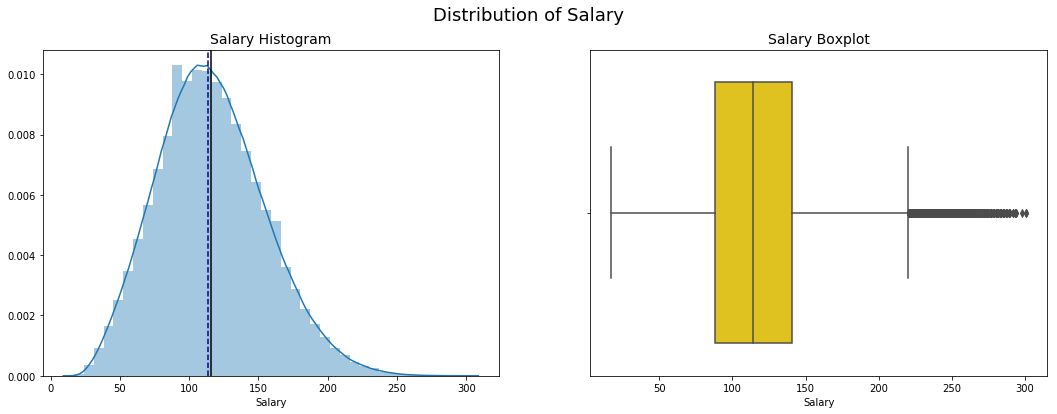

In [126]:
#Visualizing Salary

f, ax = plt.subplots(1,2,figsize=(18,6))
sns.distplot(train_merged['Salary'], ax=ax[0], bins=40, kde=True, norm_hist=True)
ax[0].axvline(np.mean(train_merged['Salary']), color='black')
ax[0].axvline(np.median(train_merged['Salary']), color='darkblue', linestyle='--')
ax[0].set_title('Salary Histogram',fontsize = 14)
sns.boxplot(train_merged['Salary'], ax=ax[1], color='gold')
ax[1].set_title('Salary Boxplot', fontsize = 14)
f.suptitle('Distribution of Salary', fontsize = 18)

print("The Black line in Dist. Plot shows the mean at: ",round(train_merged['Salary'].mean()))
print("The Dotted line in the Dist. Plot shows the median at: ", round(train_merged['Salary'].median()))

#Displaying the Upper & Lower limits of the range of Salary with IQR rule.

stat = train_merged.Salary.describe()
#print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The Inter-quartile Range (IQR) is: ', IQR)
print('The Upper and Lower Bounds for suspected outliers in the Boxplot are {} and {}.'.format(upper, lower))

In [127]:
print(stat)

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: Salary, dtype: float64


We can say that the findings of Skewness and Kurtosis in the previous cell is confirmed as the Salary follows an almost normal distribution with some very little amount of Skew to the right.

There can be observed some outliers in the Boxplot which will have to be analyzed for significance and cleaned if needed.

###Analyzing Outliers from Boxplot and cleaning data further

In [128]:
#Since we have the upper & lower bounds set, we will check the salary values at those places

train_merged.loc[train_merged.Salary< 8.5]

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience (Years),Miles from Metropolis,Salary


We have an empty set, meaning no values exist below lower bound

In [129]:
train_merged.loc[train_merged['Salary']>220.5].shape

(7117, 9)

There are 7117 jobs that have salaries above the upper bound

In [130]:
#Displaying the different job types with Salaries above upper bound

train_merged.loc[train_merged['Salary'] > 220.5, 'Job Type'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: Job Type, dtype: int64

In [131]:
#Trying to analyze the roles with salaries above the upper bound  

train_merged[(train_merged['Salary'] > 220.5) & (train_merged['Job Type'] == 'JUNIOR')]

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience (Years),Miles from Metropolis,Salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


### Displaying Correlation between Features and Target Variable

####Instead of performing manual comparison for every independent variable with Salary, we can define a function that gives a line plot when independent variable is Numerical value and a box plot when independent variable is categorical data

In [0]:
#Defining plotting function

def plot_var(df, var):
  plt.figure(figsize = (14, 6))
  plt.subplot(1, 2, 1)
  
  #if the independent variable is an integer
  if df[var].dtype == 'int64':
    df[var].value_counts().sort_index().plot()
    plt.xticks(rotation = 45)
    plt.xlabel(var)
    plt.ylabel('Counts')
    plt.title('Distribution of {}'.format(var))
    plt.subplot(1, 2, 2)
    
  else:
    #We change variable data type to Categorical and group them by the mean of 
    #Salary in every column
    mean = df.groupby(var)['Salary'].mean()
    df[var] = df[var].astype('category').copy()
    levels = mean.sort_values().index.tolist()
    df[var].cat.reorder_categories(levels, inplace=True)
    df[var].value_counts().plot()
    plt.xticks(rotation = 45)
    plt.xlabel(var)
    plt.ylabel('Counts')
    plt.title('Distribution of {}'.format(var))
    plt.subplot(1, 2, 2)

    if df[var].dtype == 'int64' or var == 'Company ID':
        #plot the mean salary for each category and fill between the 
        #(mean - std, mean + std)
        mean = df.groupby(var)['Salary'].mean()
        std = df.groupby(var)['Salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
        
    else:
        sns.boxplot(x=var, y='Salary', data = df.sort_values('Salary'))
    
    plt.xticks(rotation = 45)
    plt.ylabel('Salaries')
    plt.title('Relationship of Salary with {}'.format(var))
    plt.show()

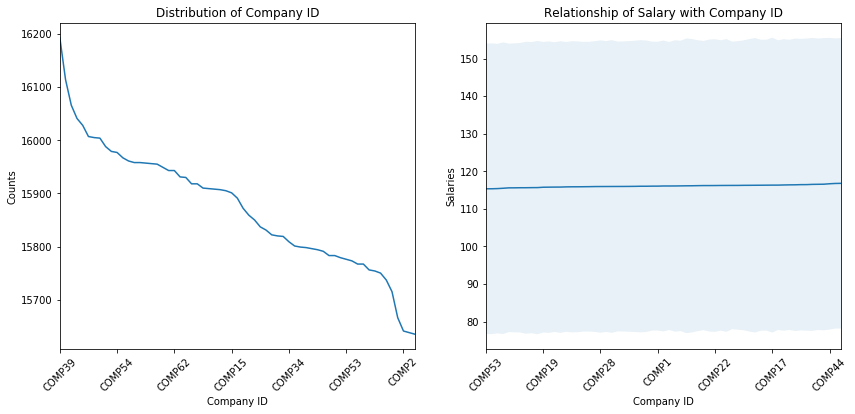

In [258]:
#Correlation between Company ID and Salary
plot_var(train_merged, 'Company ID')

There is no apparant correlation between Company ID and Salaries

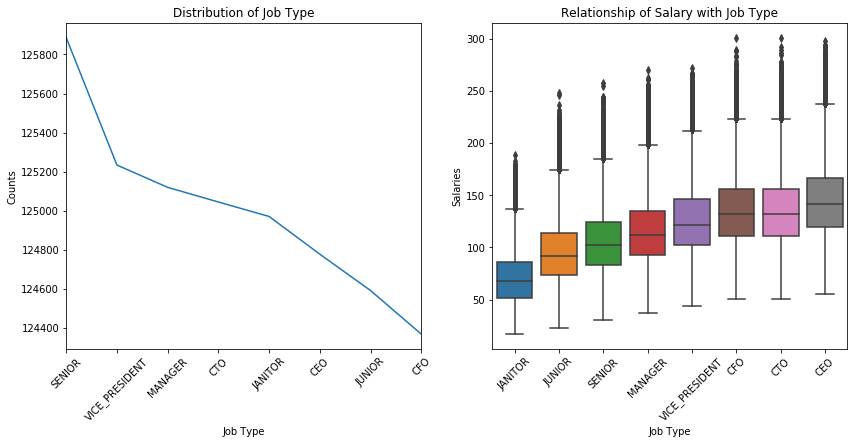

In [238]:
#Correlation between Job Type and Salary
plot_var(train_merged, 'Job Type')

We can observe a positive correlation between the Job Type and Salaries. To validate further, we can observe that Salaries increase from Janitor roles to those of CFO, CTO and CEOs.

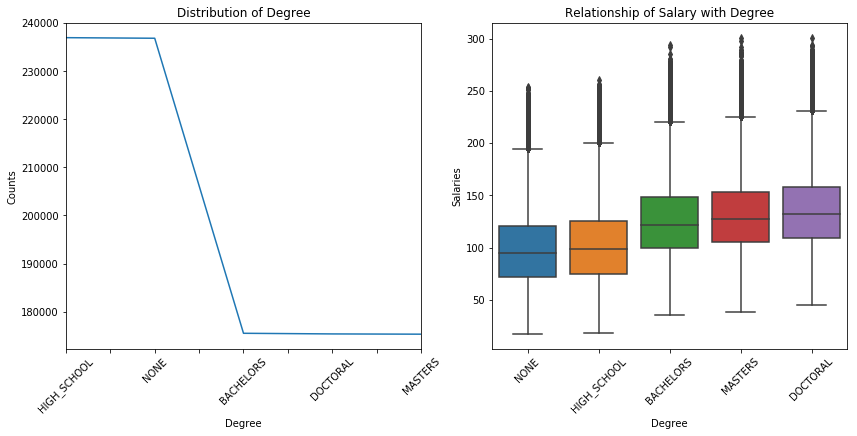

In [260]:
#Correlation between Degree and Salary
plot_var(train_merged, 'Degree')

We see a positive correlation between deree type and salaries. PhD's earn more than high school graduates or those without any degree.

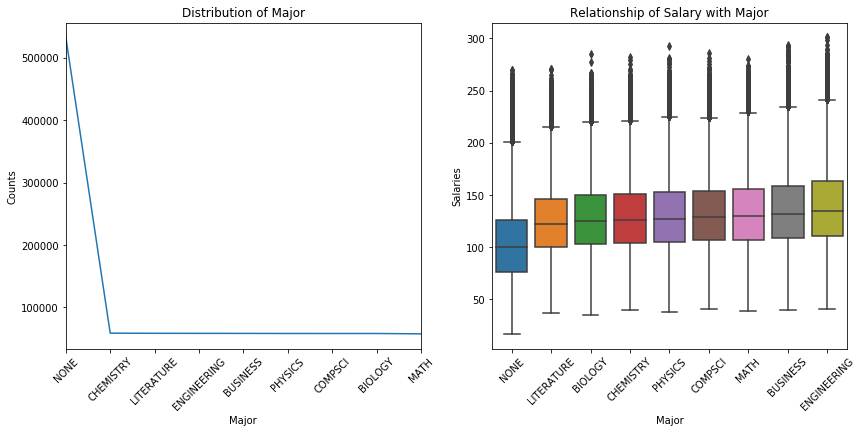

In [261]:
#Correlation between Major and Salary
plot_var(train_merged, 'Major')

Engineering Manjors have shown to earn the highest as compared to others

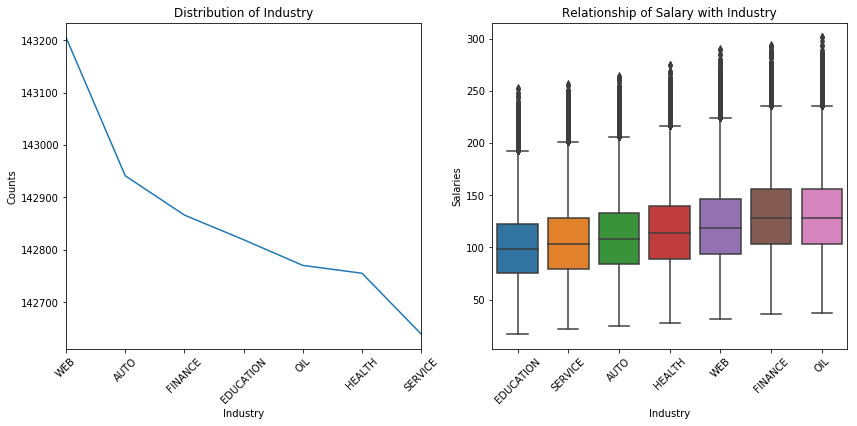

In [262]:
#Correlation between Industry and Salary
plot_var(train_merged, 'Industry')

There is also a positive correlation between industries and salaries. Oil and Gas is the most profitable industry of all

(0, 315.32917172733397)

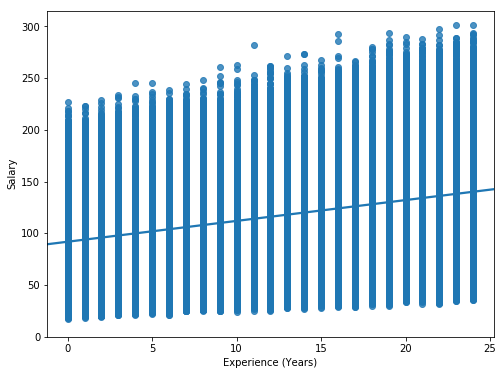

In [252]:
#Correlation between Experience and Salary using Regression Plot

plt.figure(figsize=(8, 6))
sns.regplot(x="Experience (Years)", y="Salary", data = train_merged)
plt.ylim(0,)

We can see a positive correlation between experience and salary, as the lm plot suggests. Out analysis could further be aided by **Residual Plot analysis** of these variables.

*A residual plot shows the spread of its residuals. If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.*

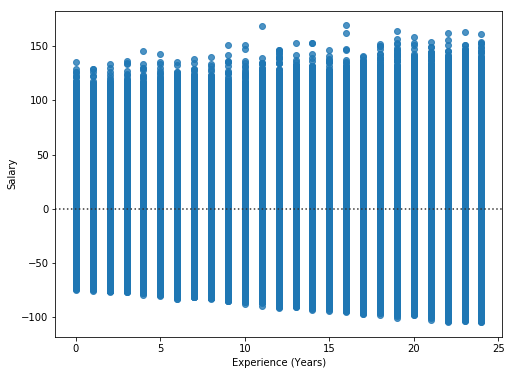

In [255]:
#Residual Plot

plt.figure(figsize=(8, 6))
sns.residplot(train_merged['Experience (Years)'], train_merged['Salary'])
plt.show()

We can observe that variance in Salary figures seems to increase slightly with Experience. However, the data is spread away from its regression line with a weekly positive correlation between Experience and Salary

**We do the same with Miles from Metropolis and Salary variables**

(0, 315.32917172733397)

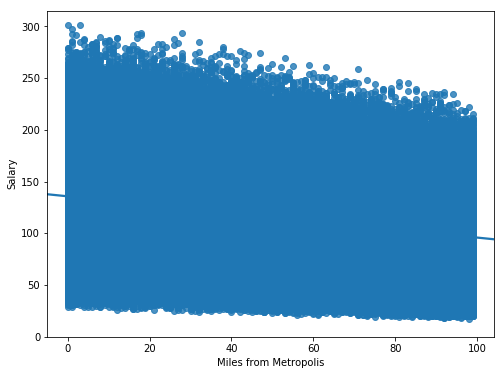

In [256]:
#Correlation between Job Type and Miles from Metro using Regression Plot

plt.figure(figsize=(8, 6))
sns.regplot(x="Miles from Metropolis", y="Salary", data = train_merged)
plt.ylim(0,)

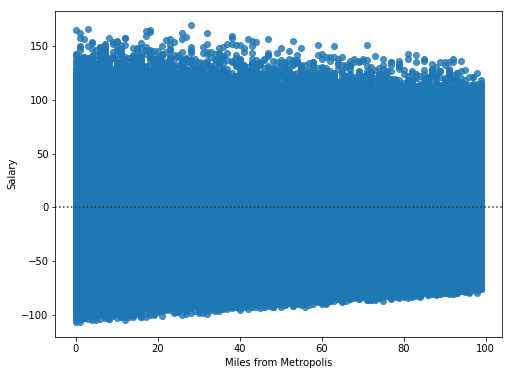

In [257]:
#Residual Plot

plt.figure(figsize=(8, 6))
sns.residplot(train_merged['Miles from Metropolis'], train_merged['Salary'])
plt.show()

We can definitely see a negative correlation between Miles from Metropolis and Salary. This is somewhat understandable as most of the jobs are normally offerred closer to city centre.

## ---- 5 Establish a baseline ----

In [0]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

## ---- 6 Hypothesize solution ----

In [0]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

# Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [0]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [0]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [0]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [0]:
#select the model with the lowest error as your "prodcuction" model

# Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [0]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [0]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data